### <font color='white'> Financial Processes Simulation Course <font>

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Logo_ITESO_normal.jpg/138px-Logo_ITESO_normal.jpg" width="138" height="240" align-text="auto" margin="auto" />


<font color = 'gray'> 

**Team:**
1. [Roberto Chávez Guerrero](https://github.com/Robertochavezgue)<br>
2. [Esteban Márquez Delgado](https://github.com/EstebanMqz)

**Date:** October 21, 2021.

**Professor:** [Oscar David Jaramillo Zuluaga](https://github.com/odjaramilloz)

**Repository**: https://github.com/EstebanMqz/FPS-Hw7. 
<font>
<br><br><br><br>
<font color= 'orange'> Assignment 7: Class 11 <font>

##### 1. **Probability Density Functions**
- Statistical package to learn how to graph beta functions in an interval other than 0 and 1.

The optimistic value is $\mu_{o_p}$ = 49. <br>
The pessimistic value is $\mu_{p_w}$ = 40. <br>

##### *Beta distribution*

1. ¿What are the parameters of distribution $x \sim \text{B}(\alpha, \beta)$? <br>
- Plot $f(x)$ and $F(x)$ with $\alpha$ and $\beta$. <br>
- Probabilities for $f(x)$ and $F(x)$ for $\alpha$ and $\beta$. <br>

##### *Triangular distribution*
- Statistical package to learn how to graph triangular functions in an interval other than 0 and 1:


1. ¿What is the probability $P(T)$?<br>
2. Graph the triangular function on an interval [a,b], using the help.<br><br>

<span style='color:orange'> 1. Roberto Chávez Guerrero </span><br>

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
%matplotlib inline
from scipy.optimize import fsolve

In [28]:
# This function is the system of equations
def f1(p):
    alpha,beta=p
    return ((40*beta+49*alpha)/(alpha+beta)-44, (alpha*beta*(49-40)**2)/((alpha+beta)**2*(1+alpha+ beta))-9)

# Attempt to solve the system of equations
try:
    alpha,beta = fsolve(f1, (44,9))
    print(alpha,beta)
except:
    print("No solution found")

0.5432098765426324 0.6790123456783965


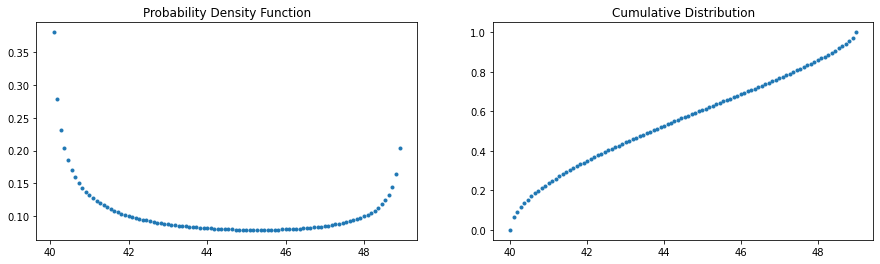

In [29]:
a=alpha
b=beta
x = np.linspace(40,49,100) #create a range of values for x
r = st.beta.pdf(x,a,b,loc=40,scale=9) #create a range of values for y
r_accum = st.beta.cdf(x,a,b,loc=40,scale=9) #create a range of values for y_acum
fig,(ax1,ax2) = plt.subplots(1,2) #create a figure with 2 subplots
fig.set_figwidth(15) #set the width of the figure
ax1.plot(x,r,'o',markersize=3) #plot the first subplot
ax1.set_title('Probability Density Function') #set the title of the first subplot
ax2.plot(x,r_accum,'o',markersize=3) #plot the 
ax2.set_title('Cumulative Distribution') #set the title of the second subplot
plt.show() #show the plot

Probabilities for $f(x)$ and $F(x)$ for $\alpha$ and $\beta$ arguments:

In [30]:
d = np.linspace(40,49,10)
#Make a dataframe with the values of the distribution probabilities
df = pd.DataFrame({'x':d, 'f(x)':st.beta.pdf(d,a,b,loc=40,scale=9), 'F(x)':st.beta.cdf(d,a,b,loc=40,scale=9),})
df

,x,f(x),F(x)
0,40.0,inf,0.000000
1,41.0,0.131828,0.236753
2,42.0,0.100257,0.349942
3,43.0,0.087532,0.443050
4,44.0,0.081379,0.527128
5,45.0,0.078950,0.607029
6,46.0,0.079669,0.686062
7,47.0,0.084573,0.767725
8,48.0,0.099395,0.858283
9,49.0,inf,1.000000


Triangular Distribution

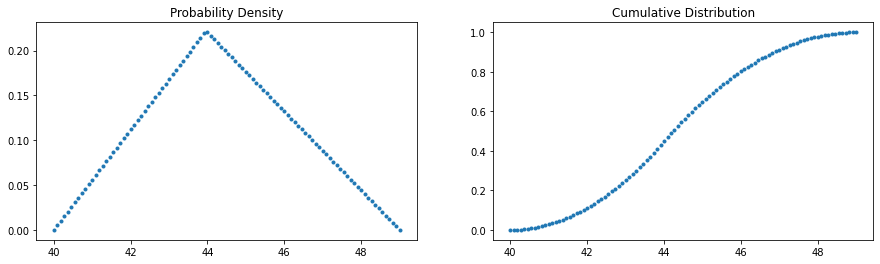

In [31]:
c = .44
x = np.linspace(40,49,100)
r = st.triang.pdf(x,c,loc=40,scale=9)
r_accum = st.triang.cdf(x,c,loc=40,scale=9)
# graph
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
ax1.plot(x,r,'o',markersize=3)
ax1.set_title('Probability Density')
ax2.plot(x,r_accum,'o',markersize=3)
ax2.set_title('Cumulative Distribution')
plt.show()

Probability that $P(T\leq d)$.

In [32]:
d = np.linspace(40,49,10)
#Make a dataframe with the values of the distribution probabilities
df2 = pd.DataFrame({'x':d, 'f(x)':st.triang.pdf(d,c,loc=40,scale=9), 'F(x)':st.triang.cdf(d,c,loc=40,scale=9),})
df2

,x,f(x),F(x)
0,40.0,0.000000,0.000000
1,41.0,0.056117,0.028058
2,42.0,0.112233,0.112233
3,43.0,0.168350,0.252525
4,44.0,0.220459,0.448854
5,45.0,0.176367,0.647266
6,46.0,0.132275,0.801587
7,47.0,0.088183,0.911817
8,48.0,0.044092,0.977954
9,49.0,0.000000,1.000000


<span style='color:lightgreen'> 2. Esteban Márquez Delgado </span><br>

##### Crude Monte Carlo vs Monte Carlo Stratified Sampling.
Report the results of the integral approximation using crude Monte Carlo vs stratified sampling, in a Dataframe. <br>

$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1 }=\frac{1}{3}\approx 0.33333$

In [33]:
# solution code
#Montecarlo integration function per se, based on random values.
def int_montecarlo(f:'Function to integrate',
                   a:'Lower limit of the integral',
                   b:'Upper limit of the integral',
                   U:'Sample of numbers U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def stratification(B: 'N strata to create'):
    '''Function that receives and creates N number of strata for the stratification method:
    Divide the population into strata and generate a number of observations in each.
    proportional to its size (to the probability of each one) in order to ensure that
    domain is covered and convergence is accelerated.
   '''
    u= np.random.uniform(a,b,B) #generate B random values ​​with uniform distribution on interval [a,b]
    i=np.arange(0,B) # variable iterable over the n layers created
    v = (u+i)/B #stratification
    return v

In [34]:
#Montecarlo integration function per se, based on random values.
def int_montecarlo(f:'Function to integrate',
                   a:'Lower limit of the integral',
                   b:'Upper limit of the integral',
                   U:'Sample of numbers U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def stratification(B: 'N strata to create',
                   a:'Lower limit of the integral',
                   b:'Upper limit of the integral'):
    '''Function that receives and creates N number of strata for the stratification method:
    Divide the population into strata and generate a number of observations in each.
    proportional to its probability in order to ensure tha domain is covered and convergence is accelerated.
   '''
    u= np.random.uniform(a,b,B) #generate B random values ​​with uniform distribution on interval [a,b]
    i=np.arange(0,B) # variable iterable over the n layers created
    v = (u+i)/B #stratification
    return v

I = 1/3 # Result of the integral
a,b = 0,1 #Integration interval
N = np.logspace(1,7,7,dtype=int) # N terms, in logarithmic scale (1, 10, 100, 1000, …, instead of 0, 1, 2, 3)
df_cv = pd.DataFrame(index=N,columns=['Crude Monte Carlo', 'Relative MC_Error %', 'Stratified Sampling',
                                      'Relative_error M_est %' ], dtype='float') # Creation of DataFrame columns
df_cv.index.name = "Terms" #Name df index.
# Random numbers dependent on the number of terms N.
u1 = list(map(lambda N:np.random.uniform(a,b,N),N)) #Random numbers for the montecarlo method.
u2 = list(map(lambda N:stratification(N,a,b),N)) #Random numbers for the stratification method.
M = [int_montecarlo(lambda x:x**2, a, b, Y) for Y in u1] #Application of the MonteCarlo method for the u1 generated numbers.
EST = [int_montecarlo(lambda x:x**2, a, b, Y) for Y in u2] #Application of the MonteCarlo method for the u2 stratified variables.
df_cv.loc[N,"Crude Monte Carlo"] = M #Raw Monte Carlo method on DataFrame over N terms.
df_cv.loc[N,"Relative MC_Error %"] = np.abs(df_cv.loc[N,"Crude Monte Carlo"]-I)*100/I #Relative error of the Monte Carlo method
df_cv.loc[N,"Stratified Sampling"] = EST #Stratification Method
df_cv.loc[N,"Relative_error M_est %"] = np.abs(df_cv.loc[N,"Stratified Sampling"]-I)*100/I #Relative error of the stratification method
df_cv



,Crude Monte Carlo,Relative MC_Error %,Stratified Sampling,Relative_error M_est %
Terms,,,,
10,0.400681,20.204299,0.328372,1.488438e+00
100,0.279583,16.125114,0.333019,9.429964e-02
1000,0.330221,0.933682,0.333329,1.334418e-03
10000,0.331126,0.662169,0.333333,2.202938e-05
100000,0.334561,0.368347,0.333333,5.670238e-06
1000000,0.333507,0.052224,0.333333,9.423226e-08
10000000,0.333314,0.005845,0.333333,4.297646e-09


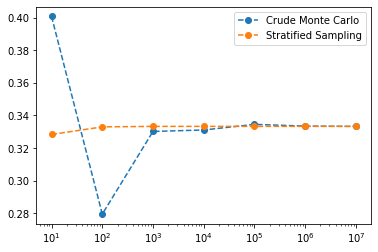

In [35]:
plt.xscale('log')
plt.plot(df_cv.index,df_cv['Crude Monte Carlo'],marker='o',linestyle='--')
plt.plot(df_cv.index,df_cv['Stratified Sampling'],marker='o',linestyle='--')
plt.legend(['Crude Monte Carlo','Stratified Sampling'])
plt.show()

As we an see, stratified sampling divides is faster because it divides the population into strata and generates a number of observations proportional to their probability of occurrence. <br>
We can also note that this process has a lower computational load and makes processes more efficient.